In [35]:
import jax
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as random
from jax import vmap

jax.config.update("jax_enable_x64",True)

In [57]:
key = random.key(8765451678)

def kernel(gamma):
    def rbf(x, y):
        return jnp.exp(-gamma*jnp.sum((x-y)**2))
    return rbf

def g(x, y):
        return jnp.arctan((x - 2*y)/4)**2*jnp.sin((y + x)/2)

k = kernel(100)

vec_k = vmap(vmap(k, in_axes=(None, 0)), in_axes=(0, None))

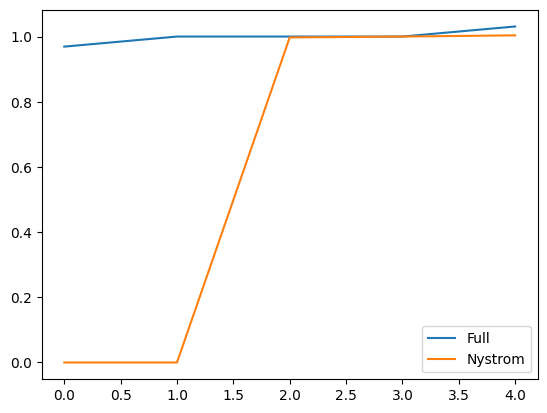

In [ ]:
X = random.uniform(key, shape=(5, 2))
Y = random.uniform(key, shape=(10, 2))
s = 3
K = vec_k(X, Y)

print(K.shape)

idxs = random.permutation(key, jnp.arange(X.shape[0]))[:s]

def Nystrom(K, idxs):
    K_SS, K_SX = K[:, idxs][idxs, :], K[idxs, :]  
    return K_SX.T @ jnp.linalg.inv(K_SS) @ K_SX

eigfull = jnp.linalg.eigvalsh(K)
eig_K = jnp.linalg.eigvalsh(Nystrom(K, idxs))

U, S, Vh = jnp.linalg.svd(K)

# for r in [0.1,0.2, 0.3, 0.5, 0.7, 0.8, 1]:

plt.figure(1)
plt.plot(eigfull, label='Full')
plt.plot(eig_K, label='Nystrom')
plt.legend()